
# 6. Más herramientas y técnicas para evaluar modelos de regresión

## Introducción

Estás trabajando en una empresa de marketing que acepta proyectos de varios clientes. A tu equipo se le ha asignado un proyecto en el que debe predecir el **porcentaje de conversiones** para una venta de Black Friday que el equipo va a planificar. 

El porcentaje de conversión según el cliente se refiere a la cantidad de personas que realmente compran productos frente a la cantidad de personas que inicialmente se registraron para recibir actualizaciones sobre la venta visitando el sitio web. 

El primer instinto es optar por un modelo de regresión para predecir el porcentaje de conversión. Sin embargo, tiene millones de filas de datos con cientos de columnas. En escenarios como estos, es muy común encontrar problemas de: 
- multicolinealidad 

donde dos o más características transmiten efectivamente la misma información. Esto puede afectar la robustez del modelo. Aquí es donde las soluciones como
- la selección recursiva de características (RFE) 
pueden ser de ayuda.

En el capítulo anterior, vimos cómo preparar datos para el modelado de regresión. También aprendimos cómo aplicar la regresión lineal e interpretar los resultados.

En este capítulo, revisará un modelo de regresión para evaluar su desempeño. Específicamente, sobre métricas como:
- el error absoluto medio (MAE) y 
- el error cuadrático medio (RMSE).

Esto ayudará a elegir las funciones adecuadas para usar en un modelo, así como a comparar diferentes modelos en función de sus valores MAE y RMSE. 


También revisaremos RFE, que es una técnica  y de uso común para seleccionar solo las características más relevantes para construir un modelo de regresión, eliminando así las redundantes.

Finalmente, revisaremos sore los métodos de regresión basados ​​en árboles y por qué a veces superan a las técnicas de regresión lineal.




## Evaluación de la precisión de un modelo de regresión
Para evaluar modelos de regresión, se debe definir algunas métricas. Las métricas comunes utilizadas para evaluar los modelos de regresión se basan en:
- los conceptos de residuos
- y errores, 

que son cuantificaciones de cuánto un modelo predice incorrectamente un punto de datos en particular. 




### Residuos y errores
Un concepto importante para comprender cómo evaluar los modelos de regresión es el residual. 

El residual se refiere a la diferencia entre el valor predicho por el modelo y el valor real de un punto de datos. 

Se puede pensar en cuánto perdió su modelo un valor en particular. En el siguiente diagrama, podemos ver una línea de mejor ajuste (o regresión) con puntos de datos dispersos por encima y por debajo. La distancia entre un punto de datos y la línea indica qué tan lejos está la predicción $(x_i, y_i)$ del valor real $(x_j, y_j)$. Esta diferencia se conoce como residuo. Los puntos de datos debajo de la línea tomarán valores negativos, mientras que los de arriba tomarán valores positivos:

<figure>
<center><img src='https://drive.google.com/uc?export=view&id=1_r31odVs9IdKplaYnSH-VROJpRm2u0t_' width="600" />
<figcaption>
Figura 6.1: Estimación del residual</figcaption></center>
</figure>


El residual se toma como una estimación del error de un modelo, donde el error es la diferencia entre el verdadero proceso subyacente a la generación de datos y el modelo o, en otras palabras, la diferencia entre el valor real y el valor predicho. No podemos observar directamente el error porque no conocemos el verdadero proceso,
y por lo tanto, usamos los valores residuales como nuestra mejor estimación del error. Por esta razón, el error y el residual están estrechamente relacionados y, a menudo, se usan indistintamente.
Por ejemplo, si se le pide que cree un modelo de aprendizaje automático para predecir
la edad promedio de todas las personas en un país, el error significaría la diferencia entre la edad promedio real y la edad promedio predicha. Sin embargo, encontrar
el promedio real sería una tarea difícil ya que necesitaría recopilar datos para todo el país. Aún así, podrías hacer la mejor estimación del promedio tomando la media de las edades de algunas personas en el país. Esta suposición se puede usar para encontrar el residuo y, por lo tanto, servir como error.

En este punto, podría estar pensando, ¿por qué necesitamos otra métrica de evaluación? ¿Por qué no simplemente tomar el promedio de los residuos? Tratemos de entender esto con la ayuda de un ejemplo. La siguiente tabla presenta el precio de venta real de algunos artículos y los precios de venta de los mismos artículos pronosticados por un modelo de aprendizaje automático (todos los precios están en rupias nacionales indias):

<figure>
<center><img src='https://drive.google.com/uc?export=view&id=1F0V6VZNXfImITy7ibgRTNBT8YzkRXtAV' width="600" />
<figcaption>
Figura 6.2: Cálculo del residuo medio</figcaption></center>
</figure>



Como puede observar en la Figura 6.2, el residuo promedio es cero; sin embargo, observe que el modelo no está funcionando bien. Falta cada punto de datos. Por lo tanto, sabemos con certeza que el error es distinto de cero. La razón por la que obtenemos el residual promedio como cero es que los valores negativos y positivos de los residuales se cancelan y, por lo tanto, debemos buscar valores de residuales absolutos o cuadrados. Esto ayuda a centrarse sólo en la magnitud de los residuos.

Analicemos dos de las métricas de evaluación más utilizadas: MAE y RMSE, las cuales siguen el razonamiento que discutimos en el párrafo anterior. En lugar de centrarse en los signos positivos o negativos de los residuos, tanto el MAE como el RMSE convierten los residuos en magnitudes, lo que da la estimación correcta del rendimiento del modelo.

### Error absoluto medio
Hay varias formas de utilizar los residuos para evaluar un modelo. Una forma es simplemente tomar el valor absoluto de todos los residuos y calcular el promedio. Se llama
el error absoluto medio (MAE), y puede pensarse intuitivamente como la diferencia promedio que debe esperar entre las predicciones de su modelo y el valor real:
Figura 6.3: Ecuación para calcular el MAE de un modelo

<h1><center>
$MAE=\frac{1}{n} \sum^{n}_{j=1} \big| y_j- \hat{y_j} \big|$

Figura 6.3: Ecuación para calcular el MAE de un modelo
</center></h1>


En la ecuación anterior, $y_j$ es el valor verdadero de la variable de resultado para el punto de datos $j$, y $\hat{y_j}$ es la predicción del modelo para ese punto de datos. Restando estos términos y tomando el valor absoluto, obtenemos el residual. $n$ es el número de puntos de datos $y$, por lo tanto, al sumar todos los puntos de datos y dividir por $n$, obtenemos la media del error absoluto.

Por lo tanto, un valor de cero significaría que su modelo predice todo a la perfección, y valores más grandes significan un modelo menos preciso. 


Si tenemos varios modelos, podemos mirar el MAE y preferir el modelo con el valor más bajo. Podemos implementar MAE usando la biblioteca scikit-learn.

Podemos implementar MAE usando la biblioteca scikit-learn

1. Importaremos la métrica mean_absolute_error de la
módulo sklearn.metrics:
    
```
      from sklearn.metrics import mean_absolute_error
```

2. A continuación, solo necesitamos llamar a la función mean_absolute_error con dos argumentos: predicciones y los valores de ground_truth:

```
      MAE = mean_absolute_error(predicciones, ground_truth)
```

Un problema con el MAE es que da cuenta de todos los errores por igual. Para muchas aplicaciones del mundo real, los errores pequeños son aceptables y esperados, mientras que los errores grandes pueden generar problemas mayores. Sin embargo, con MAE, dos errores medianos podrían sumarse y superar un error grande. Esto significa que el MAE puede preferir un modelo que sea bastante preciso para la mayoría de las predicciones, pero que ocasionalmente sea extremadamente inexacto sobre un modelo con errores más consistentes en todas las predicciones. Por esta razón, en lugar de usar el error absoluto, una técnica común es usar el error cuadrático.

### Error cuadrático medio de la raíz
Como discutimos anteriormente, otra forma de enfocarse solo en las magnitudes de los residuos es elevando al cuadrado sus valores, lo que ayuda a deshacerse de los signos positivos o negativos. Este concepto sirve como el núcleo de la métrica **RMSE**. 

Al elevar al cuadrado el término de error, los errores grandes se ponderan más que los pequeños que suman la misma cantidad total de error. Si luego tratamos de optimizar el error cuadrático medio (MSE) en lugar del MAE, terminaremos con una preferencia por modelos con predicciones más consistentes, ya que esos grandes errores se penalizarán en gran medida. La siguiente figura ilustra cómo, a medida que aumenta el tamaño del residuo, el error cuadrático crece más rápidamente que el error absoluto:

<figure>
<center><img src='https://drive.google.com/uc?export=view&id=1GnARgTXLORqqBIXc1JhZKx3Tg1WGaz3t' width="500" />
<figcaption>
Figura 6.2: Cálculo del residuo medio</figcaption></center>
</figure>


Figura 6.4: Error cuadrático versus error absoluto
Sin embargo, una desventaja de esto es que el término de error se vuelve más difícil de interpretar. El MAE nos da una idea de cuánto debemos esperar que la predicción difiera del valor real en promedio, mientras que el MSE es más difícil de interpretar. Por ejemplo, en el caso del problema de predicción de la edad anterior, el MSE estaría en las unidades de "año al cuadrado", asumiendo que la edad está en años. Se puede ver lo difícil que es comprender decir que un modelo tiene un error de 5 años al cuadrado. Por lo tanto, es común tomar la raíz del MSE, lo que da como resultado el RMSE, como lo muestra la siguiente ecuación:



<h1><center>

$RMSE = \sqrt{\frac{1}{2} \sum^{n}_{j=1} ( y_j- \hat{y_j} )^2 }$

Figura 6.5: Ecuación para calcular el RMSE de un modelo
</center></h1>

Al igual que MAE, podemos implementar RMSE usando la biblioteca scikit-learn, como se muestra aquí:

1. Importaremos la métrica `mean_squared_error` desde el módulo `sklearn.metrics`:

```
    From sklearn.metrics import mean_squared_error
```

2. A continuación, solo necesitamos llamar a la función mean_squared_error con dos argumentos: predictions y los valores  ground_truth:

```
    RMSE = mean_squared_error(predictions, ground_truth)
```





Ahora que hemos discutido tanto el RMSE como el MAE en detalle, es hora de implementarlos utilizando la biblioteca scikit-learn y comprender cómo ayudan las métricas de evaluación.

### Ejercicio 6.01: Evaluación de modelos de regresión de ingresos por ubicación utilizando el MAE y RMSE

Una cadena de tiendas ha reducido cinco predictores que cree que tendrán un impacto en los ingresos de una de sus tiendas. 
- número de competidores, 
- el ingreso medio en la región, 
- el número de miembros del programa de lealtad, 
- la densidad de población en el área y 
- la antiguedad de la tienda. 

El equipo de marketing ha tenido la intuición que el número de competidores puede no ser un factor significativo que contribuya a los ingresos. Su tarea es averiguar si esta intuición es correcta.


En este ejercicio, calculará tanto el MAE como el RMSE para modelos creados con los datos de ingresos de la ubicación de la tienda utilizados en el Capítulo 5. 


**Comparar los modelos creados utilizando todos los predictores con un modelo creado excluyendo uno de los predictores.** Esto ayudará a comprender la importancia del predictor para explicar los datos. Si la eliminación de un predictor específico da como resultado una gran caída en el rendimiento, significa que el predictor era importante para el modelo y no se debe descartar.

1. Importe pandas y utilícelo para crear un DataFrame a partir de los datos en `location_rev.csv`. Nombrar a este DataFrame df y revisar las primeras cinco filas

In [ ]:
import pandas as pd

!curl https://raw.githubusercontent.com/limspiga/customer-analytics/main/week-4b/location_rev.csv -O

df = pd.read_csv('location_rev.csv') 
df.head()

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 41442  100 41442    0     0   248k      0 --:--:-- --:--:-- --:--:--  248k


,revenue,num_competitors,median_income,num_loyalty_members,population_density,location_age
0,42247.80,3.0,30527.57,1407.0,3302.0,12.0
1,38628.37,3.0,30185.49,1025.0,4422.0,11.0
2,39715.16,1.0,32182.24,1498.0,3260.0,12.0
3,35593.30,5.0,29728.65,2340.0,4325.0,10.0
4,35128.18,4.0,30691.17,847.0,3774.0,11.0


2. Importe **train_test_split** desde sklearn. Defina la variable y como `revenue` y X como `num_competitors`, `median_income`, `num_loyalty_members`, `population_density` y `location_age`:

In [ ]:
from sklearn.model_selection import train_test_split
X = df[['num_competitors',
        'median_income',
        'num_loyalty_members',
        'population_density',
        'location_age']]
y = df['revenue']

3. Realice una división de prueba de entrenamiento en los datos, usando random_state=15, y guarde los resultados en `X_train`, `X_test`, `y_train` y `y_test`:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split (X, y, random_state = 15)

4. Importe LinearRegression desde sklearn para ajustar un modelo de regresión lineal a los datos de entrenamiento:

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

5. Obtenga las predicciones del modelo para los datos de `X_test` y almacene el resultado en una variable llamada predicciones:

In [ ]:
predictions = model.predict(X_test)


6. En lugar de calcular el RMSE y el MAE usted mismo, puede importar funciones de sklearn para que lo hagan por usted. Tenga en cuenta que sklearn solo contiene una función para calcular el MSE, por lo que debemos sacar la raíz de este valor para obtener el RMSE (ahí es donde entra el 0.5). Use el siguiente código para calcular el RMSE y MAE:

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print('RMSE: ' +  str(mean_squared_error(predictions, y_test)**0.5))
print('MAE: ' +  str(mean_absolute_error(predictions, y_test)))

RMSE: 5133.736391468813
MAE: 4161.387875602788


Ahora, reconstruya el modelo después de eliminar num_competitors de los predictores y evalúe el nuevo modelo. Cree las variables X_train2 y X_test2 eliminando num_competitors de X_train y X_test. Entrene un modelo usando X_train2 y genere nuevas predicciones a partir de este modelo usando X_test2:

In [ ]:
X_train2 = X_train.drop('num_competitors', axis=1)
X_test2 = X_test.drop('num_competitors', axis=1)
model.fit(X_train2, y_train)
predictions2 = model.predict(X_test2)

8. Calcule el RMSE y el MAE para las predicciones del nuevo modelo e imprímalos, de la siguiente manera:

In [ ]:
print('RMSE: ' + str(mean_squared_error(predictions2, y_test)**0.5))
print('MAE: ' + str(mean_absolute_error(predictions2, y_test)))

RMSE: 5702.030002037037
MAE: 4544.416946418695


Tenga en cuenta que ambos valores son más altos que los valores que calculamos para el modelo anterior. Esto significa que eliminar num_competitors de nuestro modelo aumentó el error en nuestro modelo en el conjunto de prueba. En otras palabras, nuestro modelo era más preciso cuando contenía num_competitors. Por lo tanto, la intuición del equipo de marketing no fue correcta.

## Uso de la selección recursiva de características para la eliminación de características
Hasta ahora, hemos discutido dos métricas de evaluación importantes: 
- el MAE y 
- el RMSE. 

También vimos cómo se pueden usar estas métricas con la ayuda de la biblioteca scikit-learn y cómo se puede usar un cambio en los valores de estas métricas como indicador de la importancia de una característica. 
Sin embargo, si tiene una gran cantidad de funciones, eliminar una función a la vez se convertiría en un trabajo muy tedioso, y aquí es donde entra en juego RFE. 

Cuando un conjunto de datos contiene características que no están **relacionadas** con la columna de destino o están relacionadas con otras columnas, el rendimiento del modelo puede verse afectado negativamente.

Por ejemplo, suponga que desea predecir el número de ventas de un producto dado el precio de costo del producto, el descuento disponible, el precio de venta del producto y la fecha en que se lanzó por primera vez al mercado. Como es de esperar, la fecha de lanzamiento del producto original no afectará las ventas actuales.

Significa que la función (fecha de lanzamiento del producto original) no está relacionada con la columna de destino (ventas del producto). De manera similar, el precio de costo del producto se convierte en información redundante si el precio de venta y el descuento ya están disponibles, que es un ejemplo del segundo caso, en el que una columna está relacionada con otras columnas.

Cuando una o más características tienen una baja correlación (dependencia entre dos columnas) con la columna de destino, esto significa que estas columnas no proporcionarán ninguna información útil para el modelo. Sin embargo, si aún los incluimos mientras entrenamos el modelo, el modelo se verá obligado a aprender (incorrectamente) que estas columnas tienen algún efecto en la columna de destino.

Un escenario similar puede ocurrir cuando las características tienen una alta correlación. 


1. Primero, importe RFE desde el paquete scikit-learn: from sklearn.feature_selection import RFE


In [ ]:
from sklearn.feature_selection import RFE


2. A continuación, cree una instancia de RFE mientras especifica cuántas funciones desea seleccionar. Por ejemplo, si desea seleccionar 5 funciones, utilizará el siguiente código:


In [ ]:
rfe = RFE(estimator = LinearRegression(), n_features_to_select=5)


3. Ajuste el modelo RFE en el conjunto de datos de entrenamiento:

In [ ]:
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=5)

4. A continuación, puede averiguar qué columnas fueron seleccionadas por RFE y cuáles no, utilizando el siguiente código:

In [ ]:
for featureNum in range(X_train.shape[1]):
  # If feature was selected
  if rfe.support_[featureNum] == True:
    # Print feature name and rank
    print("Feature: {}, Rank:{}"\
          .format(X_train.columns[featureNum],\
                  rfe.ranking_[featureNum]))

Feature: num_competitors, Rank:1
Feature: median_income, Rank:1
Feature: num_loyalty_members, Rank:1
Feature: population_density, Rank:1
Feature: location_age, Rank:1


In [ ]:
# Ahora, obtengamos algo de experiencia práctica en el uso de RFE en el 
# próximo ejercicio. Reutilizaremos el código que estudiamos aquí para RFE 
# en este próximo ejercicio.

### Ejercicio 6.02: Uso de RFE para la selección de funciones

Para este ejercicio, se le proporcionaron datos de los ingresos de las tiendas en diferentes ubicaciones y una serie de 20 puntajes basados ​​en métricas internas en el archivo 20scores.csv. No se le dice qué significan las puntuaciones, pero se le pide que cree un modelo predictivo que utilice la menor cantidad posible de estas puntuaciones sin sacrificar la capacidad de predecir los ingresos por ubicación.

1. Importe pandas, lea los datos de 20scores.csv en un DataFrame llamado df y muestre las primeras cinco filas de datos usando la función head:

In [ ]:
import pandas as pd
!curl https://raw.githubusercontent.com/limspiga/customer-analytics/main/week-4b/20scores.csv -O

df = pd.read_csv('20scores.csv') 
df.head()

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  393k  100  393k    0     0  1248k      0 --:--:-- --:--:-- --:--:-- 1244k


,revenue,score0,score1,score2,score3,score4,score5,score6,score7,score8,...,score10,score11,score12,score13,score14,score15,score16,score17,score18,score19
0,30698.74,0.067763,1.762772,0.211119,0.619655,-1.586284,0.051320,-0.529940,-0.177908,-0.387431,...,-1.246132,-1.817742,-0.189583,-1.636507,0.088087,0.481573,2.243539,0.330061,-1.019798,-1.409513
1,46813.75,0.943657,-0.696100,3.503075,1.323145,-0.579567,-1.379598,0.013465,1.061996,-0.952645,...,1.115770,0.455824,0.109667,-0.790210,1.876311,0.610918,0.208647,1.505998,0.671251,0.315013
2,39493.35,-0.070838,-1.817580,-0.156724,-0.159741,-1.564338,-0.817489,0.125174,-1.053015,0.181246,...,-0.006912,-0.009129,-0.324959,1.040768,0.375134,-0.127496,1.435406,3.267201,-0.010580,-1.725084
3,48130.55,-0.133306,0.815997,2.261204,0.794839,-0.947440,0.049189,-0.042403,1.657086,-2.870217,...,2.183177,0.364106,0.686530,0.112862,1.840957,-1.003409,1.641141,1.469621,-1.839971,-0.456130
4,35129.09,0.452780,1.529394,0.085364,-0.787245,1.351148,-0.340774,0.354099,-0.319731,-0.776033,...,2.000792,1.035293,-0.719229,-3.073072,-0.078145,-0.154752,0.117198,0.226051,-1.447333,0.463009


2. Extraiga la variable objetivo (y) y la variable predictora (X) de los datos:

In [ ]:
x_cols = df.columns[1:]
X = df[x_cols]
y = df['revenue']

3. Importe train_test_split y realice una división de prueba de tren en los datos con random_state=10, almacenando los ingresos en la variable y y todas las demás características en la variable X:

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split\
                                   (X, y, random_state = 10)

4. Importe LinearRegression de sklearn y ajuste un modelo de regresión lineal en los datos de entrenamiento:

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

5. Mire los coeficientes del modelo usando el siguiente código:

In [ ]:
model.coef_

# Tenga en cuenta que todos estos valores son distintos de cero. 
# Por lo tanto, el modelo está utilizando todas las variables.

array([ 3.10465458e+01,  1.35929333e+00, -1.71996170e+01, -4.26396854e+00,
       -4.56514104e+00,  2.71178012e+01,  1.12523398e+01, -9.62768549e+00,
        1.28097189e+01, -3.82102937e+01, -3.92691076e+00, -4.49267755e+00,
        9.12581579e+03,  2.81237962e+01,  1.26722148e+01,  1.99096955e+01,
       -1.73401880e+01,  3.77047162e+03, -7.57356369e+00,  4.99844116e+03])



6. Ahora importa RFE desde sklearn. Utilice un modelo de regresión lineal como estimador, que RFE utilizará en cada iteración. Además, deberá especificar la cantidad de funciones que desea seleccionar. Por ahora, mantén solo cinco características:

In [ ]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=LinearRegression(), n_features_to_select=5)

7. Entrene el modelo RFE que acaba de crear en el paso anterior en los datos de entrenamiento usando el siguiente comando:

In [ ]:
rfe.fit(X_train,y_train)

# Esto proporcionará el siguiente resultado:

RFE(estimator=LinearRegression(), n_features_to_select=5)


8. Imprima las columnas que fueron seleccionadas por RFE junto con sus rangos:

In [ ]:
for featureNum in range(X_train.shape[1]):
  # If feature was selected
  if rfe.support_[featureNum] == True:
    # Print feature name and rank
    print("Feature: {}, Rank: {}".format(X_train.columns[featureNum],\
              rfe.ranking_[featureNum]))
  
  # La salida obtenida para este código se da aquí:

Feature: score0, Rank: 1
Feature: score9, Rank: 1
Feature: score12, Rank: 1
Feature: score17, Rank: 1
Feature: score19, Rank: 1


In [ ]:
# Tenga en cuenta que RFE solo seleccionó cinco características y que a todas 
# esas características se les otorgó un rango de 1, lo que significa que 
# RFE consideró que las cinco características eran
# igualmente importante.

9. Usando la información anterior, ahora cree un conjunto de datos reducido que tenga solo las columnas seleccionadas por RFE:

In [ ]:
X_train_reduced = X_train[X_train.columns[rfe.support_]]
X_test_reduced = X_test[X_train.columns[rfe.support_]]

10. A continuación, utilice el conjunto de datos de entrenamiento reducido para ajustar un nuevo modelo de regresión lineal:

In [ ]:
rfe_model = LinearRegression()
rfe_model.fit(X_train_reduced,y_train)

LinearRegression()

11. Importe mean_squared_error de sklearn y utilícelo para calcular el RMSE del modelo de regresión lineal en los datos de prueba:

In [ ]:
from sklearn.metrics import mean_squared_error
predictions = model.predict(X_test)
print(mean_squared_error(predictions, y_test)**0.5)

491.78833768572423


12. De manera similar, calcule el RMSE del modelo generado en el paso 9 en los datos de prueba:

In [ ]:
rfe_predictions = rfe_model.predict(X_test_reduced)
print(mean_squared_error(rfe_predictions, y_test)**0.5)

487.6184171986594


Puede observar que, aunque el conjunto de datos reducido obtenido con RFE solo tiene cinco características, su RMSE es más bajo que el modelo lineal que las usa todas. Esto demuestra que no ha perdido poder predictivo, aunque ha simplificado mucho el modelo al eliminar variables.

En la próxima actividad, usaremos RFE para descubrir las tres funciones principales para predecir el gasto del cliente. Esto le dará una idea de cómo se puede utilizar RFE en problemas de marketing en los que suele haber un mayor número de columnas.

## Modelos de regresión basados ​​en árboles
En la actividad anterior identificamos características más importantes para predecir el gasto del cliente. Ahora, imagina hacer lo mismo eliminando cada característica una a la vez y averiguando el RMSE. **RFE** tiene como objetivo eliminar la tarea redundante de revisar cada función haciéndola internamente, sin obligar al usuario a esforzarse para hacerlo manualmente.


Los modelos lineales no son el único tipo de modelos de regresión. Otra técnica poderosa es el uso de **árboles de regresión**. Los árboles de regresión se basan en la idea de un árbol de decisión. Un árbol de decisión es un poco como un diagrama de flujo, donde, en cada paso, pregunta si una variable es mayor o menor que algún valor. Después de seguir varios de estos pasos, llega al final del árbol y recibe una respuesta para qué valor debe tener la predicción. 

La siguiente figura ilustra el funcionamiento de los árboles de regresión. 



<figure>
<center><img src='https://drive.google.com/uc?export=view&id=1f9TzngFX4o3X1jWzgmsXJTv6EXdDNM11' width="500" />
<figcaption>
Figura 6.11: Un árbol de regresión (izquierda) y cómo analiza el espacio de características en predicciones</figcaption></center>
</figure>


Por ejemplo, si desea predecir la edad de una persona con una altura de 1,7 m y un peso de 80 kg, entonces, utilizando el árbol de regresión (izquierda), dado que la altura es inferior a 1,85 m, seguirá la rama izquierda . De igual forma, como el peso es menor a 90 kg, seguirás la rama izquierda y terminarás en 18. Esto quiere decir que la edad de la persona es de 18 años:



Los árboles de decisión son interesantes porque 
- pueden detectar tendencias en los datos que la regresión lineal podría pasar por alto o capturar de manera deficiente. 

Mientras que los modelos lineales asumen una relación lineal simple entre los predictores y un resultado, los árboles de regresión dan como resultado funciones más complejas, que pueden ajustarse a ciertos tipos de relaciones con mayor precisión.
La implementación permanece igual que el modelo de regresión lineal en `scikit-learn`, la única diferencia es que esta vez, en lugar de importar `LinearRegression`, deberá importar `DecisionTreeRegressor`, como se muestra aquí:

    from sklearn.tree import DecisionTreeRegressor

A continuación, puede crear una instancia del regresor del árbol de decisión. En el siguiente código, puede cambiar la profundidad máxima del árbol según los requisitos:

    tree_model = DecisionTreeRegressor(max_depth=2)
    
Un parámetro importante para los árboles de regresión es la profundidad máxima del árbol. Cuanta más profundidad se le permita a un árbol, más compleja será la relación que puede modelar. Si bien esto puede sonar como algo bueno, elegir una profundidad máxima demasiado alta puede conducir a un modelo que está muy sobreajustado a los datos. De hecho, la tendencia al sobreajuste es uno de los mayores inconvenientes de los árboles de regresión. Ahí es donde los bosques aleatorios son útiles.

## Bosques aleatorios (Random Forests)
Para superar el problema del sobreajuste, en lugar de entrenar un solo árbol para encontrar patrones en los datos, muchos árboles se entrenan sobre subconjuntos aleatorios de datos. Las predicciones de estos árboles luego se promedian para producir una predicción. 

Combinando árboles juntos de esta manera se llama un **bosque aleatorio**. Se ha encontrado que esta técnica supera muchas de las debilidades asociadas con los árboles de regresión. La siguiente figura ilustra un conjunto de modelos de árbol, cada una de cuyas predicciones se promedian para producir las predicciones del conjunto.

Vemos que se entrena una cantidad n de árboles sobre subconjuntos aleatorios de datos. Entonces, la media de las predicciones de esos árboles es la predicción deseada:


<figure>
<center><img src='https://drive.google.com/uc?export=view&id=1RJhgtIRCfEDxAmKFiXOwvV4cVf7vFAGB' width="500" />
<figcaption>
Figura 6.12: Un conjunto de modelos de árboles</figcaption></center>
</figure>


Similar a los árboles de regresión discutidos en la sección anterior, los bosques aleatorios se pueden crear siguiendo los siguientes pasos con la ayuda de la biblioteca scikit-learn. 

Primero, importe `RandomForestRegressor` desde el módulo scikit-learn: from sklearn.module import RandomForestRegressor
A continuación, puede crear una instancia del regresor de bosque aleatorio. 



```
    from sklearn.module import RandomForestRegressor

```



En el siguiente código, puede cambiar la profundidad máxima de los árboles presentes en el bosque aleatorio según sus requisitos:

```
    forest_model = RandomForestRegressor(máx_profundidad=2)
```

Debido a que los métodos basados ​​en árboles y la regresión lineal son tan drásticamente diferentes en la forma en que se ajustan a los datos, a menudo funcionan bien en diferentes circunstancias. Cuando las relaciones en los datos son lineales (o casi), los modelos lineales tenderán a producir predicciones más precisas, con la ventaja de ser fáciles de interpretar. Cuando las relaciones son más complejas, los métodos basados ​​en árboles pueden funcionar mejor. Por ejemplo:
 - La ganancia obtenida por una empresa y la ganancia obtenida por cada anuncio que publican es una relación lineal. 
 - Si la ganancia obtenida por cada anuncio se duplica, la ganancia general de la empresa también se duplicará. Sin embargo, la cantidad de anuncios no necesariamente tiene que seguir una relación lineal con la ganancia, ya que puede tener 100 anuncios con un rendimiento bajo, en comparación con solo un anuncio con un rendimiento realmente bueno. 
 - Esta es una relación compleja, o no lineal. Probar cada uno y elegir el mejor modelo para el trabajo requiere evaluar los modelos en función de su precisión predictiva con una métrica como el RMSE. La elección depende en última instancia de los datos con los que esté trabajando.

Por ejemplo, si se da cuenta durante las etapas iniciales del análisis de datos (supongamos que nota que los puntos de datos siguen aproximadamente una curva lineal) que un modelo lineal se ajustará a los datos con precisión, es mejor optar por un modelo de regresión lineal en lugar de los modelos de regresión basados ​​en árboles más complejos. En el peor de los casos, puede probar ambos enfoques y elegir el más preciso.


### Ejercicio 6.03: Uso de modelos de regresión basados ​​en árboles para capturar Tendencias datos no lineales 

En este ejercicio, se examina un conjunto de datos simple en donde se tienen datos sobre el gasto de los clientes y sus edades. 
Se requiere averiguar cómo cambian los hábitos de gasto con la edad en sus clientes y qué tan bien pueden capturar los diferentes modelos
esta relacion. Tener un modelo como este puede ayudar a crear patrones de sitios web específicos para la edad de sus clientes, ya que podrá recomendar productos que se adapten a los niveles de gasto de los clientes.

1. Importar pandas y leer los datos de `age_spend.csv`. Utilizar la función `head` para ver las primeras cinco filas de los datos

In [1]:
import pandas as pd

!curl https://raw.githubusercontent.com/limspiga/customer-analytics/main/week-4b/age_spend.csv -O

df = pd.read_csv('age_spend.csv')
df.head()

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 13011  100 13011    0     0  59410      0 --:--:-- --:--:-- --:--:-- 59410


,spend,age
0,2725.0,20.0
1,3010.0,38.0
2,2782.0,25.0
3,2809.0,31.0
4,2774.0,54.0


2. Extraiga la variable objetivo (y) y la variable predictora (X) de los datos:

In [6]:
X = df[['age']] # igual que df['age']
y = df['spend']

3. Importar `train_test_split` de sklearn y utilízarlo para realizar una división de prueba de entrenamiento de los datos, con `random_state=10`, y siendo $y$ el gasto, y $X$ la edad:

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X, y, random_state = 10)

4. Importe `DecisionTreeRegressor` de sklearn y ajuste dos árboles de decisión a los datos de entrenamiento, uno con profundidad máxima = 2 y otro con profundidad máxima = 5:

In [9]:
from sklearn.tree import DecisionTreeRegressor
max2_tree_model = DecisionTreeRegressor(max_depth=2)
max2_tree_model.fit(X_train,y_train)
max5_tree_model = DecisionTreeRegressor(max_depth=5)
max5_tree_model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5)

5. Importe `LinearRegression` de sklearn y ajuste un modelo de regresión lineal a los datos de entrenamiento, como se muestra:

In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

# Obtendrá el siguiente resultado:

LinearRegression()

6. Importe `mean_squared_error` de sklearn. Para el modelo lineal y los dos modelos de árbol de regresión, obtenga predicciones del modelo para el conjunto de prueba y utilícelas para calcular el RMSE. Usa el siguiente código:

In [11]:
from sklearn.metrics import mean_squared_error
linear_predictions = model.predict(X_test)
print('Linear model RMSE: ' + \
      str(mean_squared_error(linear_predictions, y_test)**0.5))
max2_tree_predictions = max2_tree_model.predict(X_test)
print('Tree with max depth of 2 RMSE: ' + \
      str(mean_squared_error(max2_tree_predictions, y_test)**0.5))
max5_tree_predictions = max5_tree_model.predict(X_test)
print('tree with max depth of 5 RMSE: ' + \
      str(mean_squared_error(max5_tree_predictions, y_test)**0.5))

Linear model RMSE: 159.07639273785358
Tree with max depth of 2 RMSE: 125.1920405443602
tree with max depth of 5 RMSE: 109.73376798374653


In [12]:
# Debería obtener los siguientes valores RMSE para los modelos lineal y 
# de árbol de decisión con profundidades máximas de 2 y 5, 
# respectivamente: 159,07639273785358, 125,1920405443602 y 109,73376798374653.

# Observe que el modelo lineal tiene el mayor error, 
# El árbol de decisión con una profundidad máxima de 2 funciona mejor 
# El árbol de decisión con una profundidad máxima de 5 tiene el error más bajo de los tres.

7. Importar matplotlib. Cree una variable llamada `ages` para almacenar un `DataFrame` con una sola columna que contenga edades de 18 a 70 años, de modo que podamos hacer que los modelos nos den sus predicciones para todas estas edades:

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
ages = pd.DataFrame({'age':range(18,70)})

8. Crear un diagrama de dispersión con los datos de la prueba y, sobre él, graficar las predicciones del modelo de regresión lineal para el rango de edades. Traza con `color='k'` y `linewidth=5` para que sea más legible:

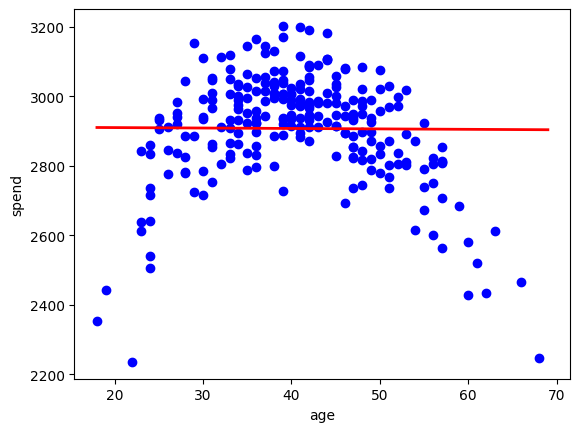

In [24]:
plt.scatter(X_test.age.tolist(), y_test.tolist(), color='blue') 
plt.plot(ages,model.predict(ages), color='red', linewidth=2, \
         label="Linear Regression")
plt.xlabel("age")
plt.ylabel("spend")
plt.show()

# Puede ver que el modelo de regresión lineal solo muestra una línea plana 
# a través de las edades; no logra captar el hecho de que las personas de 
# alrededor de 40 años gastan más, mientras que las personas menores y mayores 
# de 40 años gastan menos.

9. Cree otro diagrama de dispersión con los datos de prueba, esta vez trazando las predicciones del modelo max2_tree en la parte superior con color='k' y linewidth=5:

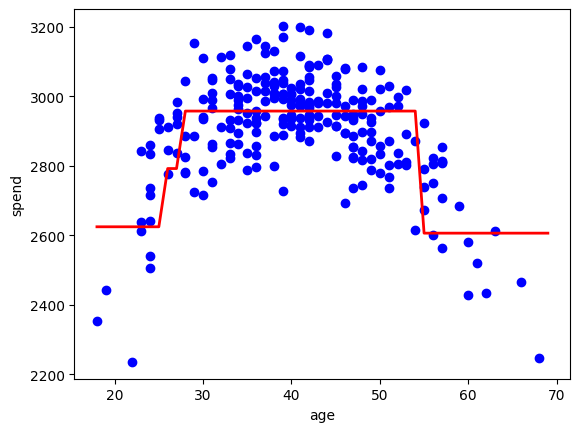

In [23]:
plt.scatter(X_test.age.tolist(), y_test.tolist(), color='blue')
plt.plot(ages,max2_tree_model.predict(ages), \
         color='red',linewidth=2,label="Tree with max depth 2")
plt.xlabel("age")
plt.ylabel("spend")
plt.show()

# Este modelo hace un mejor trabajo al capturar la relación,
# aunque no captura la fuerte disminución en las poblaciones
# más viejas o más jóvenes.


10. Cree un gráfico de dispersión más con los datos de prueba, esta vez trazando las predicciones del modelo max5_tree en la parte superior con color='k' y linewidth=5:

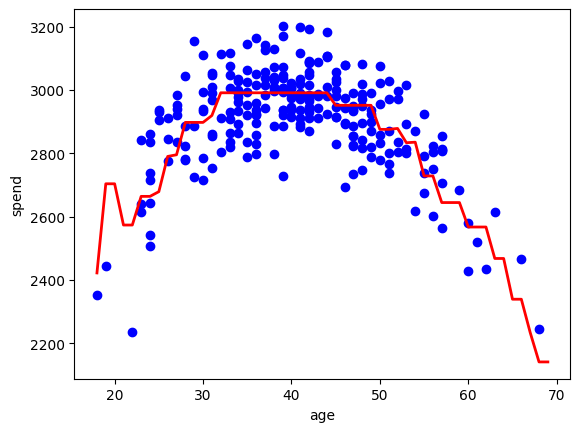

In [26]:
plt.scatter(X_test.age.tolist(), y_test.tolist(), color='blue')
plt.plot(ages,max5_tree_model.predict(ages), color='red',\
         linewidth=2, label="Tree with max depth 5")
plt.xlabel("age")
plt.ylabel("spend")
plt.show()

In [ ]:
# Este modelo hace un mejor trabajo al capturar la relación, capturando 
# adecuadamente una fuerte disminución en la población más vieja o más joven.

11. Realicemos ahora una regresión de **bosque aleatorio** con los mismos datos. Importe `RandomForestRegressor` de sklearn. Ajuste dos modelos de bosque aleatorios con `random_state=10`, uno con `max_depth=2` y el otro con `max_depth=5`, y guárdelos como `max2_forest_model` y `max5_forest_model`, respectivamente:

In [31]:
from sklearn.ensemble import RandomForestRegressor
max2_forest_model = RandomForestRegressor\
                    (max_depth=2, random_state=10)
max2_forest_model.fit(X_train,y_train)
max5_forest_model = RandomForestRegressor\
                    (max_depth=5, random_state=10)
max5_forest_model.fit(X_train,y_train)

RandomForestRegressor(max_depth=5, random_state=10)

12. Calcule e imprima el RMSE para los dos modelos de bosque aleatorio utilizando el siguiente código:

In [32]:
max2_forest_predictions = max2_forest_model.predict(X_test)
print('Max depth of 2 RMSE: ' + \
      str(mean_squared_error(max2_forest_predictions, \
                             y_test)**0.5))
max5_forest_predictions = max5_forest_model.predict(X_test)
print('Max depth of 5 RMSE: ' + \
      str(mean_squared_error(max5_forest_predictions, \
                             y_test)**0.5))

Max depth of 2 RMSE: 116.57417072810561
Max depth of 5 RMSE: 109.05510027963649


In [ ]:
# Se deben obtener los siguientes valores RMSE para los modelos de bosque 
# aleatorio con profundidades máximas de 2 y 5, 
# respectivamente: 115.51279667457273 y 109.61188562057568. 

# Tenga en cuenta que puede haber algunas diferencias mínimas en estos valores.

# Con base en los valores RMSE obtenidos, 
# podemos ver que los modelos de bosque aleatorio se desempeñaron mejor que 
# los modelos de árbol de regresión de la misma profundidad. 
# Además, todos los modelos de regresión basados ​​en árboles 
# superaron al modelo de regresión lineal.

13. Cree otro diagrama de dispersión con los datos de prueba, esta vez trazando las predicciones del modelo max2_forest_model en la parte superior con color='k' y linewidth=5:

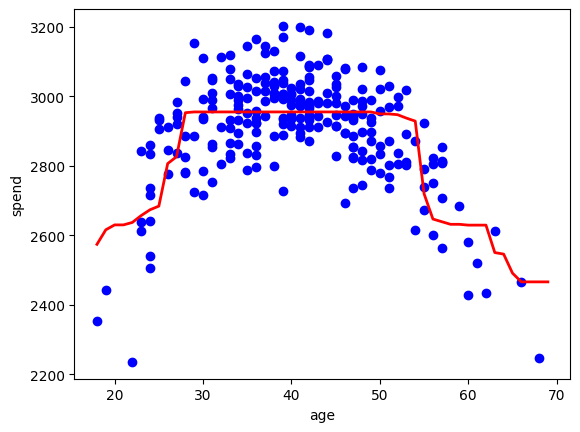

In [33]:
plt.scatter(X_test.age.tolist(), y_test.tolist(),color='blue')
plt.plot(ages,max2_forest_model.predict(ages), color='red', 
         linewidth=2, label="Forest with max depth 2")
plt.xlabel("age")
plt.ylabel("spend")
plt.show()

# Podemos ver que este modelo captura la tendencia de los datos mejor que el 
# árbol de decisiones, pero aún así no captura la tendencia en los extremos 
# muy alto o bajo de nuestro rango.

14. Cree otro diagrama de dispersión con los datos de prueba, esta vez trazando las predicciones del modelo max2_forest_model en la parte superior con color='k' y linewidth=5:

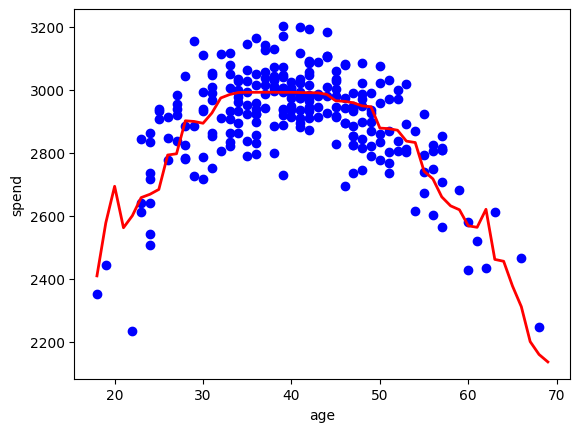

In [34]:
plt.scatter(X_test.age.tolist(), y_test.tolist(), color='blue')
plt.plot(ages, max5_forest_model.predict(ages), color='red',\
         linewidth=2, label="Forest with max depth 5")
plt.xlabel("age")
plt.ylabel("spend")
plt.show()

Nuevamente, en el modelo, la mayor profundidad máxima hace un mejor trabajo al capturar la relación, capturando adecuadamente la fuerte disminución en los grupos de población más viejos y más jóvenes.
Los resultados anteriores se pueden agrupar fácilmente para crear el gráfico que se muestra aquí, que presenta una buena comparación del uso de diferentes atributos de profundidad máxima mientras se entrena el modelo de bosque aleatorio.




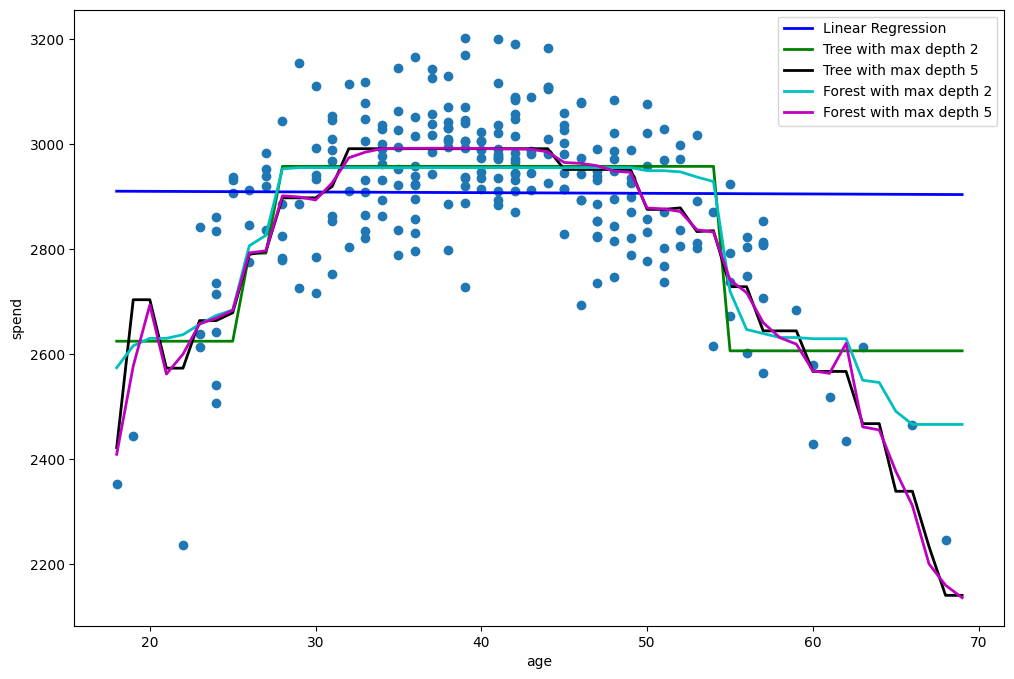

In [37]:
plt.figure(figsize=(12,8))
plt.scatter(X_test.age.tolist(), y_test.tolist())
plt.plot(ages,model.predict(ages), color='b', linewidth=2, \
         label="Linear Regression")
plt.plot(ages,max2_tree_model.predict(ages), color='g',\
         linewidth=2,label="Tree with max depth 2")
plt.plot(ages,max5_tree_model.predict(ages), color='k',\
         linewidth=2, label="Tree with max depth 5")
plt.plot(ages,max2_forest_model.predict(ages), color='c',\
         linewidth=2, label="Forest with max depth 2")
plt.plot(ages,max5_forest_model.predict(ages), color='m',\
         linewidth=2, label="Forest with max depth 5")
plt.legend()
plt.xlabel("age")
plt.ylabel("spend")
plt.show()

Hemos visto que los modelos basados ​​en árboles superaron al modelo de regresión lineal ya que los datos no eran lineales. 

Entre los modelos basados ​​en árboles, 
- El modelo de bosque aleatorio tuvo el valor RMSE más bajo. 

- También vio que al aumentar la profundidad máxima de 2 a 5, la curva comenzó a ajustarse más al conjunto de datos de entrenamiento.

Explorará esta parte en detalle en capítulos posteriores. También vio que para las personas de entre 20 y 40 años, el gasto total aumentó con la edad; sin embargo, para las personas mayores de 50 años, la tendencia fue completamente opuesta.